<class 'numpy.ndarray'>


 [[  0   0  12   1   2   0]
 [  0  53   5   3  39   0]
 [  0   0  72  82   0   0]
 [  0   0  56 112   0   0]
 [  0   2   2   2  84   0]
 [  0   0  41   4  14   0]]


 The accuracy in prediction by Random Forest Classifier is:  0.5477815699658704
<class 'numpy.ndarray'>


 [[  0   0  11   2   2   0]
 [  0  54   1   5  40   0]
 [  0   0 120  34   0   0]
 [  0   0  32 136   0   0]
 [  0   2   2   2  84   0]
 [  0   0  41   4  14   0]]


 The accuracy in prediction by Random Forest Classifier is:  0.6723549488054608
<class 'numpy.ndarray'>


 [[  0   0   1  12   2   0]
 [  0  72   2   5  21   0]
 [  0   1 114  32   0   7]
 [  0   4   6 156   0   2]
 [  0   8   2   3  75   2]
 [  0   2  21   2  12  22]]


 The accuracy in prediction by Random Forest Classifier is:  0.7491467576791809
<class 'numpy.ndarray'>


 [[  0   0   5   5   2   3]
 [  0  65   3   4  28   0]
 [  0   1 124  28   0   1]
 [  0   2   9 154   1   2]
 [  0   2   3   2  83   0]
 [  0   0  21   1  14 

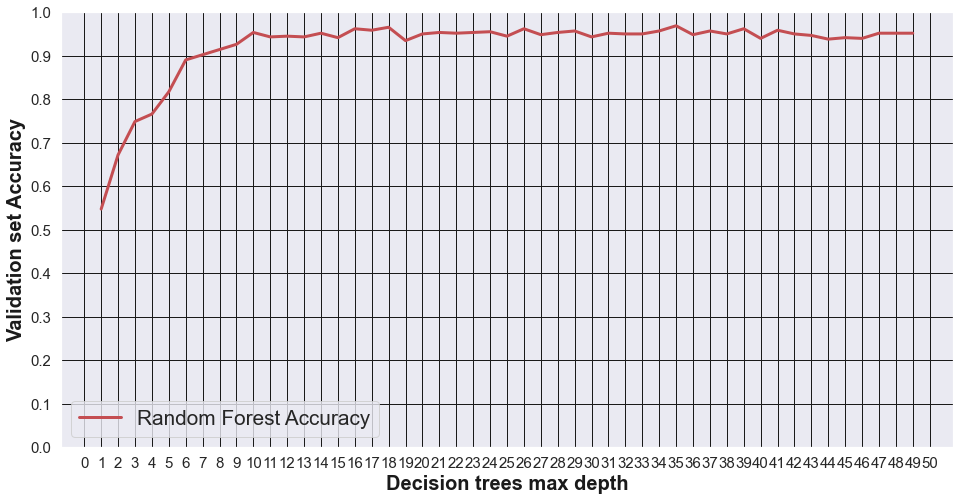

[15, 15, 15, 15, 15, 18, 15, 14, 13, 16, 15, 13, 15, 17, 15]


In [3]:
import os
import pandas as pd
#import tensorflow
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

merged_data = pd.read_csv('dataset_6classses_rms.csv')
merged_data = merged_data.drop(merged_data.columns[0], axis = 1)
um_cols = ['Bearing 1']
merged_data.columns = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2', 'FaultType']
merged_data.reset_index(drop=True, inplace=True)

num_cols = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2']

dataset_train = merged_data 

dataset = merged_data.values
scaler = StandardScaler()
X = dataset[:,0:8].astype(float)
X = scaler.fit_transform(X)
Y = dataset[:,8].astype(int)


# X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y , train_size=0.7, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y , train_size=0.7, shuffle=True)

trees_depth = []
forest_acc = []

for n_est in range(1,50,1):

    # rand_forest = RandomForestClassifier(criterion="entropy", random_state=0, max_features='sqrt',n_estimators=n_est, bootstrap=True)
    rand_forest = RandomForestClassifier(criterion="entropy", max_features='sqrt',n_estimators=15,max_depth=n_est, bootstrap=True)

    model = rand_forest.fit(X_train,y_train)

    pred = model.predict(X_test)

    pred_acc = confusion_matrix(y_test, pred)
    # pred_recall = recall_score(y_test, pred)
    print(type(pred_acc))

    cm_trace =  np.trace(pred_acc)
    elements_sum = np.sum(pred_acc)

    accuracy = cm_trace/elements_sum

    forest_acc.append(accuracy)
    trees_depth.append(n_est)

    print('\n\n',pred_acc)
    print('\n\n The accuracy in prediction by Random Forest Classifier is: ',accuracy)


fig = plt.figure("Figure",figsize=(16,8))

subplot1 = fig.add_subplot(1,1,1)
plt.plot(trees_depth,forest_acc, '-r',label = 'Random Forest Accuracy', lw = 3)

plt.xlabel('Decision trees max depth', color = 'k', fontsize = 20, fontweight = 'bold')
plt.ylabel('Validation set Accuracy', color = 'k', fontsize = 20, fontweight = 'bold')
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.xticks(np.arange(0,51,1), fontsize = 15)
plt.yticks(np.arange(0,1.1,0.1),fontsize = 15)

plt.grid(True, color = 'k')

plt.show()

print([estimator.tree_.max_depth for estimator in rand_forest.estimators_])



